In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [87]:
dateparse = lambda dates:pd.datetime.strptime(dates,'%Y-%m')
data = pd.read_csv('AirPassengers.csv',parse_dates=['Month'],index_col='Month',date_parser=dateparse)


In [88]:
X = data['#Passengers']
split = len(X) / 2
X1,X2 = X.iloc[0:72],X.iloc[72:]##Splitting data into half
mean1,mean2 = X1.mean(),X2.mean()
var1 , var2 =X1.var(), X2.var()


In [89]:
print(var1,var2)
print(mean1,mean2)
data.head()

2275.6946400625984 7471.736306729265
182.90277777777777 377.69444444444446


,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [90]:
from statsmodels.tsa.stattools import adfuller

adftest = adfuller(data['#Passengers'],autolag='AIC')
adftest

(0.8153688792060423,
 0.9918802434376409,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.6929308390189)

In [91]:
# a = data['#Passengers'].copy()
a = np.log(a)

AttributeError: 'Timestamp' object has no attribute 'log'

In [92]:
adftest2 = adfuller(a,autolag = 'AIC')
adftest2


IndexError: tuple index out of range

In [93]:

import statsmodels.api as sm
Decomposition = sm.tsa.seasonal_decompose(data['#Passengers'])
# result = sm.tsa.stattools.adfuller(data.Count)
plt.show()
trend = Decomposition.trend
seasonal = Decomposition.seasonal
residual = Decomposition.resid
residual

Month
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
1949-06-01          NaN
1949-07-01   -42.622475
1949-08-01   -42.073232
1949-09-01    -8.478535
1949-10-01    11.059343
1949-11-01    28.593434
1949-12-01    16.869949
1950-01-01     8.498737
1950-02-01    29.104798
1950-03-01     8.324495
1950-04-01     6.619949
1950-05-01    -7.910354
1950-06-01   -25.152778
1950-07-01   -34.747475
1950-08-01   -35.989899
1950-09-01    -4.228535
1950-10-01     5.226010
1950-11-01    16.051768
1950-12-01    13.911616
1951-01-01    12.623737
1951-02-01    26.646465
1951-03-01    18.407828
1951-04-01     6.911616
1951-05-01     9.839646
1951-06-01   -26.486111
                ...    
1958-07-01    45.335859
1958-08-01    58.510101
1958-09-01     0.979798
1958-10-01   -10.690657
1958-11-01   -31.114899
1958-12-01   -33.005051
1959-01-01   -17.792929
1959-02-01   -28.978535
1959-03-01    -3.633838
1959-04-01   -12.296717
1959-05-01

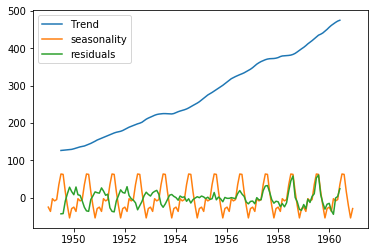

In [94]:
plt.plot(trend, label = "Trend")
plt.plot(seasonal, label = "seasonality")
plt.plot(residual, label = "residuals")
plt.legend(loc = "best")
plt.show()

In [95]:
data

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
1949-06-01,135
1949-07-01,148
1949-08-01,148
1949-09-01,136


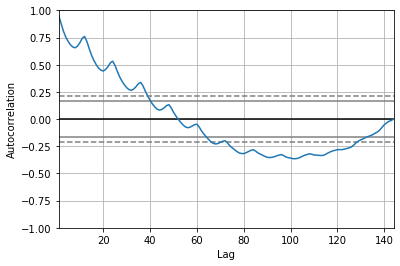

In [96]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(data['#Passengers'])

In [97]:
#  anything below zero is not in consideration
# 0.25,0.5 is decent 0.75 is highly correlated
# take the point in x and we can calculate the lags


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
No handles with labels found to put in legend.


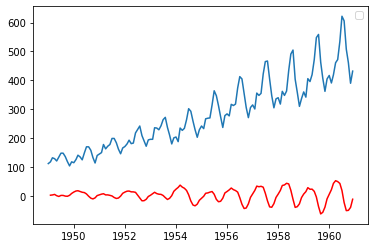

In [98]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(data['#Passengers'],order=(2,1,2))

results_AR = model.fit()

predictions = pd.Series(results_AR.fittedvalues,copy = True)

plt.plot(data['#Passengers'])
plt.plot(results_AR.fittedvalues,color = 'red')
plt.legend(loc = 'best')
plt.show()



In [105]:
from sklearn.metrics import mean_squared_error
import numpy as np
data
a = pd.to_datetime('1949-01-01')

x1 = data.drop(a)
x1
# rmse = np.sqrt(mean_squared_error(np.asarray(x1['#Passengers']),results_AR))

    

,#Passengers
Month,
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
1949-06-01,135
1949-07-01,148
1949-08-01,148
1949-09-01,136
1949-10-01,119


In [ ]:
####results_AR.save('model.json')